<a href="https://colab.research.google.com/github/ola20khaled/Python_Data_Analysis_Projects/blob/main/Portofolio_Project_Space_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries Needed

In [60]:
!pip install pycountry

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

import pycountry

#Explore Data

In [62]:
data = pd.read_csv("mission_launches.csv")

In [63]:
data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1658,1658,1658,CASC,"LC-2, Xichang Satellite Launch Center, China","Mon Dec 21, 1992 11:21 UTC",Long March 2E | Optus-B2,StatusRetired,NaN,Failure
3612,3612,3612,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Nov 29, 1968 12:40 UTC",Voskhod | Cosmos 255,StatusRetired,NaN,Success
1563,1563,1563,Lockheed,"SLC-36A, Cape Canaveral AFS, Florida, USA","Wed Aug 03, 1994 23:57 UTC",Atlas IIA | DBS-2,StatusRetired,NaN,Success
2364,2364,2364,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Thu Dec 17, 1981",Cosmos-3M (11K65M) | Radio-Sputnik 3 to 8,StatusRetired,NaN,Success
414,414,414,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed Aug 31, 2016 18:50 UTC",Long March 4C | Gaofen-10,StatusActive,64.68,Failure


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


#Cleaning Data & More Exploring


In [65]:
data.Date = pd.to_datetime(data.Date, infer_datetime_format=True)
data['Year'] = data['Date'].apply(lambda datetime: datetime.year)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020


In [66]:
data['Month'] = data['Date'].apply(lambda datetime: datetime.month)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,7


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
 9   Year            4324 non-null   int64 
 10  Month           4324 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 371.7+ KB


In [68]:
data.duplicated().values.sum()

0

In [69]:
data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Year                 0
Month                0
dtype: int64

In [70]:
# Remove chars from string
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = pd.to_numeric(data['Price'])

In [71]:
data['Price'].describe().round(2)

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max      5000.00
Name: Price, dtype: float64

In [72]:
# data.dropna(inplace=True)

data['Price'] = data['Price'].fillna(data['Price'].median())

In [73]:
data.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
Year              0
Month             0
dtype: int64

In [74]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status', 'Year', 'Month'],
      dtype='object')

In [75]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [76]:
data['Location'].value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [77]:
print(pycountry.countries.search_fuzzy('North Korea'))

[Country(alpha_2='KP', alpha_3='PRK', common_name='North Korea', flag='🇰🇵', name="Korea, Democratic People's Republic of", numeric='408', official_name="Democratic People's Republic of Korea")]


In [78]:
data["Country"] = data["Location"].str.split(", ").str[-1]
list_countries = {'Gran Canaria': 'United States',
                'Barents Sea': 'Russian Federation',
                'Russia': 'Russian Federation',
                'Pacific Missile Range Facility': 'United States',
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
                'Yellow Sea': 'China',
                'New Mexico': 'United States',
                'Iran': 'Iran, Islamic Republic of',
                'North Korea': 'Korea, Democratic People\'s Republic of',
                'Pacific Ocean': 'United States Minor Outlying Islands',
                'South Korea': 'Korea, Republic of',
                'USA' : 'United States' }
for country in list_countries:
    data.Country = data.Country.replace(country, list_countries[country])

data.head(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,2020,8,United States
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States


In [79]:
# Convert Country to alpha3 type
def convert_country_to_alpha3(country):
    return pycountry.countries.get(name=country).alpha_3


# Apply Function to the Dataframe
data['Alpha3_code'] = data['Country'].apply(convert_country_to_alpha3)

# print dataframe
data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country,Alpha3_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,2020,8,United States,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States,USA


In [80]:
organisations = data["Organisation"].value_counts()
organisations

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


# Data for Visualisation

**Mission Status**

In [81]:
mission_status = data['Mission_Status'].value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [82]:
fig = px.pie(data, names=mission_status.index, values=mission_status.values,
             title='Mission Status',
             color_discrete_sequence=px.colors.diverging.BrBG)
fig.update_layout()
fig.show()


**Have space missions gotten safer or has the chance of failure unchanged?**

In [83]:

fig = px.scatter(x=data['Year'], y=data['Mission_Status'])
fig.update_layout(xaxis_title="Years",
                  yaxis_title="Mission Status")
fig.show()

**Who launched the most missions in any given year?**

In [84]:
successful_missions = data[data["Mission_Status"] == "Success"]
successful_missions

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country,Alpha3_code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,8,United States,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,8,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,2020,8,United States,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,7,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,7,United States,USA
...,...,...,...,...,...,...,...,...,...,...,...
4316,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26 17:38:00+00:00,Juno I | Explorer 3,StatusRetired,62.00,Success,1958,3,United States,USA
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,62.00,Success,1958,3,United States,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,62.00,Success,1958,2,United States,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,62.00,Success,1957,11,Kazakhstan,KAZ


In [85]:
successful_missions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3879 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    3879 non-null   object 
 1   Location        3879 non-null   object 
 2   Date            3879 non-null   object 
 3   Detail          3879 non-null   object 
 4   Rocket_Status   3879 non-null   object 
 5   Price           3879 non-null   float64
 6   Mission_Status  3879 non-null   object 
 7   Year            3879 non-null   int64  
 8   Month           3879 non-null   int64  
 9   Country         3879 non-null   object 
 10  Alpha3_code     3879 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 363.7+ KB


**Organisations Plot**

In [87]:
successful_orgs = successful_missions['Organisation'].value_counts()
successful_orgs

RVSN USSR           1614
Arianespace          269
CASC                 231
General Dynamics     203
VKS RF               188
NASA                 186
ULA                  139
Boeing               131
US Air Force         129
Martin Marietta      100
SpaceX                94
MHI                   80
Northrop              74
Lockheed              74
ISRO                  63
Roscosmos             51
ILS                   45
Sea Launch            33
ISAS                  26
Kosmotras             21
Eurockot              12
Blue Origin           12
Rocket Lab            11
IAI                    9
ExPace                 9
ASI                    9
ESA                    9
MITT                   6
JAXA                   6
Land Launch            6
CNES                   6
AMBA                   4
ISA                    4
CASIC                  3
Arm??e de l'Air        3
Yuzhmash               2
OKB-586                2
US Navy                2
SRC                    2
KCST                   2


In [88]:
top_successful_orgs = successful_orgs[successful_orgs.values > 21 ]

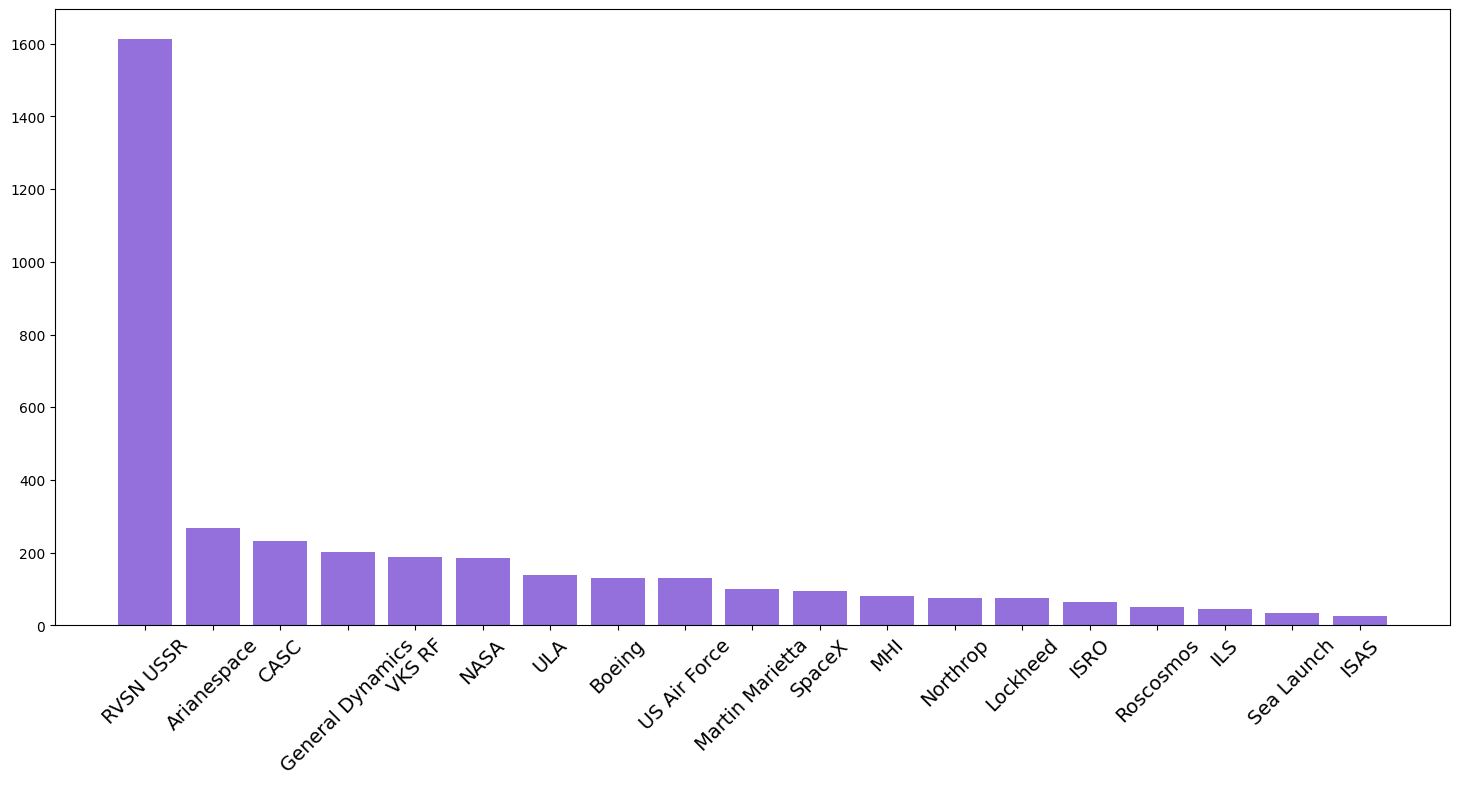

In [89]:
plt.figure(figsize=(18, 8))
plt.xticks(fontsize=14, rotation=45)

plt.bar(x=top_successful_orgs.index, height=top_successful_orgs.values,
        color='mediumpurple')

plt.show()

**Years Plot**

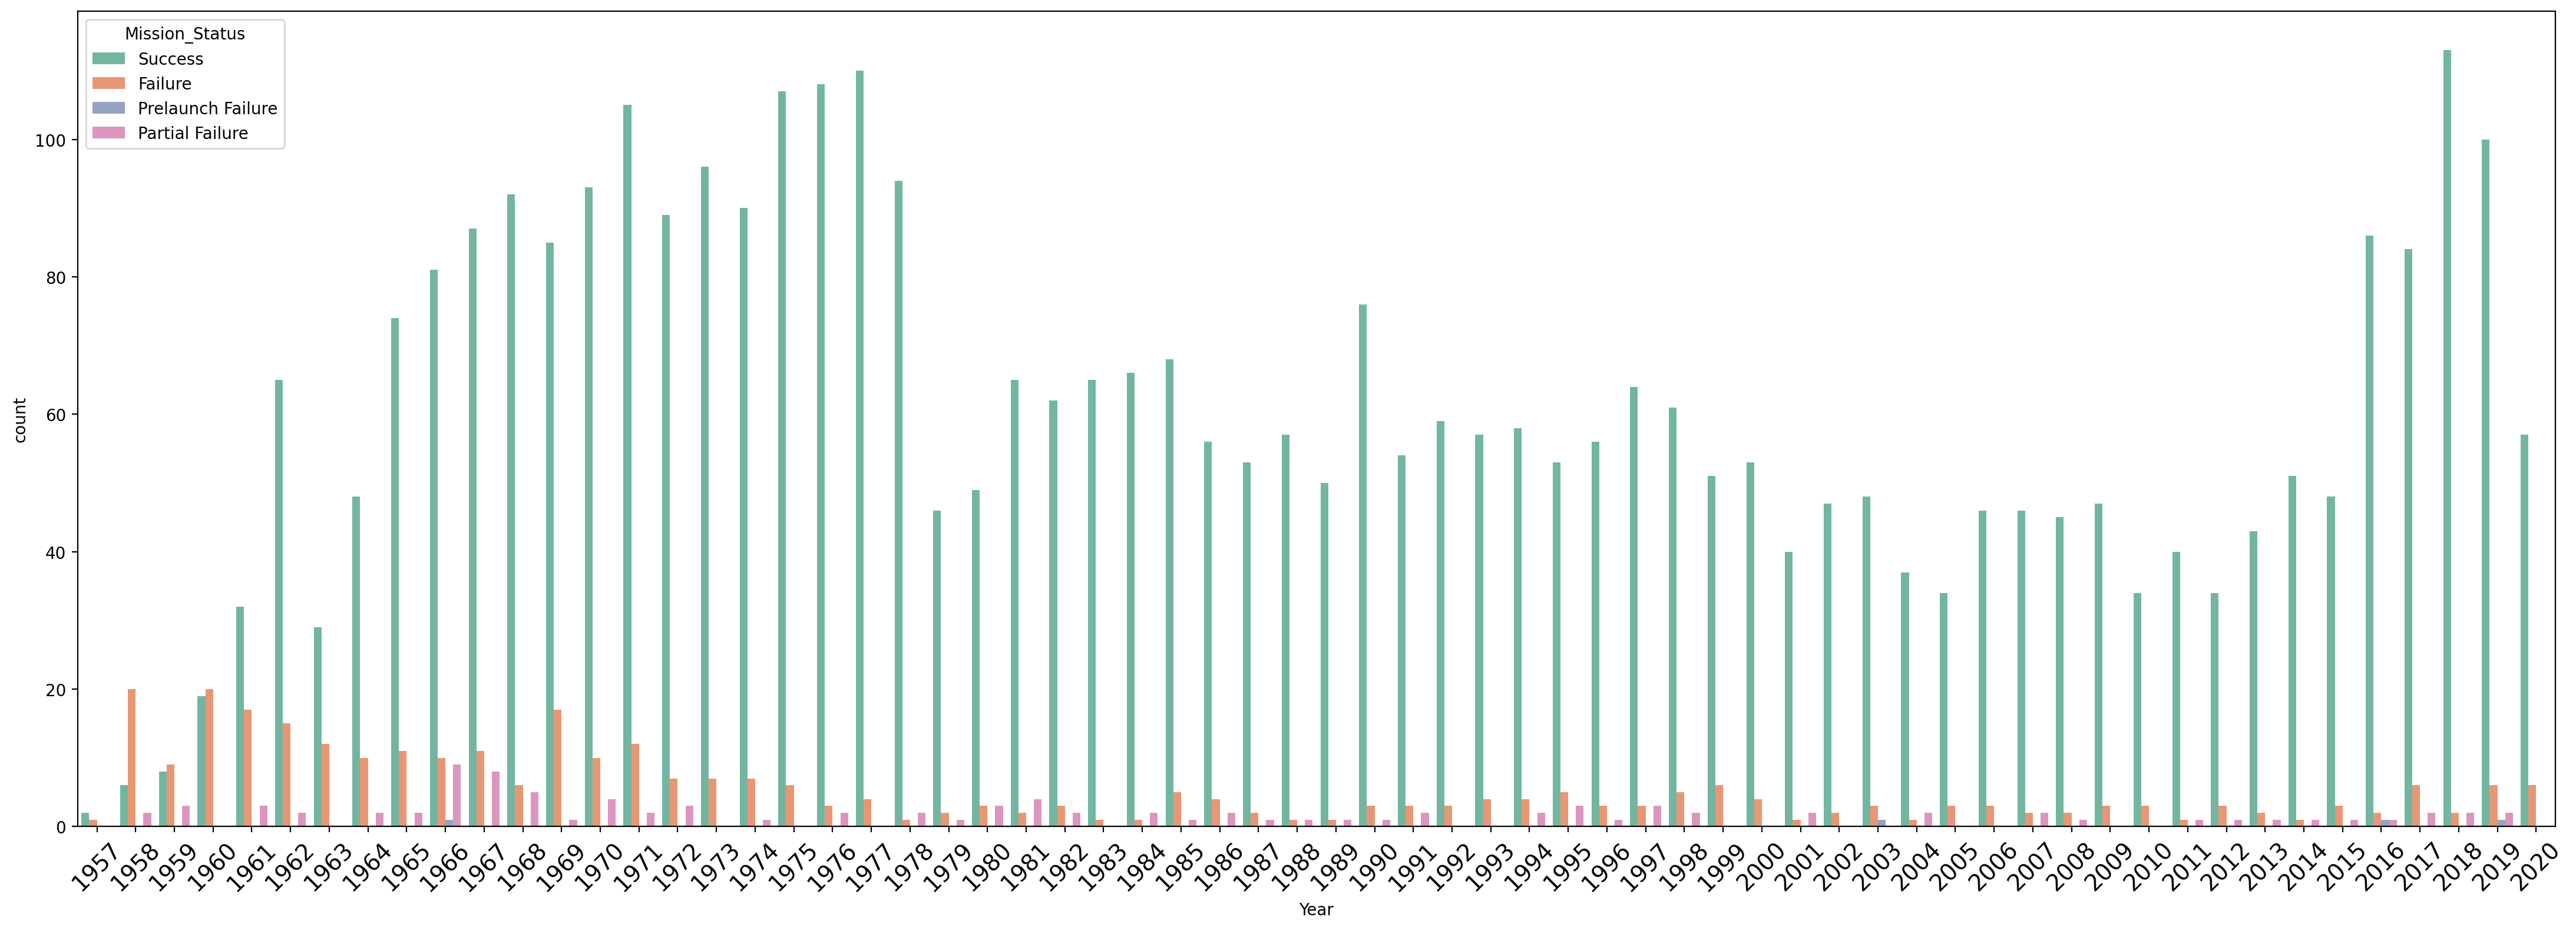

In [115]:
import matplotlib.dates as mdates

plt.figure(figsize=(22, 8), dpi=200)

plt.xticks(fontsize=14, rotation=45)

sns.countplot(data=data, x='Year', hue='Mission_Status',
              palette='Set2')

plt.tight_layout()

plt.show()

**Sunburst for Mission Status, Years and Oragnisations**

In [113]:
plt.figure(figsize=(18, 8), dpi=200)

fig = px.sunburst(data_frame=data, path=['Mission_Status', 'Year', 'Organisation', ],
                  values='Price')
fig.show()

<Figure size 3600x1600 with 0 Axes>

**Sunburst for Countries, Organisations and Mission Status**

In [92]:
plt.figure(figsize=(18, 8), dpi=200)

fig = px.sunburst(data_frame=data, path=['Country', 'Organisation', 'Mission_Status'],
                  values='Price')
fig.show()

<Figure size 3600x1600 with 0 Axes>

**How has the cost of a space mission varied over time?**

In [93]:
# print(data.Price.max())
# print(data.Price.min())
price_by_year = data.groupby('Year').agg({'Price': pd.Series.sum})
price_by_year

,Price
Year,
1957,186.00
1958,1736.00
1959,1240.00
1960,2418.00
1961,3224.00
...,...
2016,6697.27
2017,6198.41
2018,7495.98


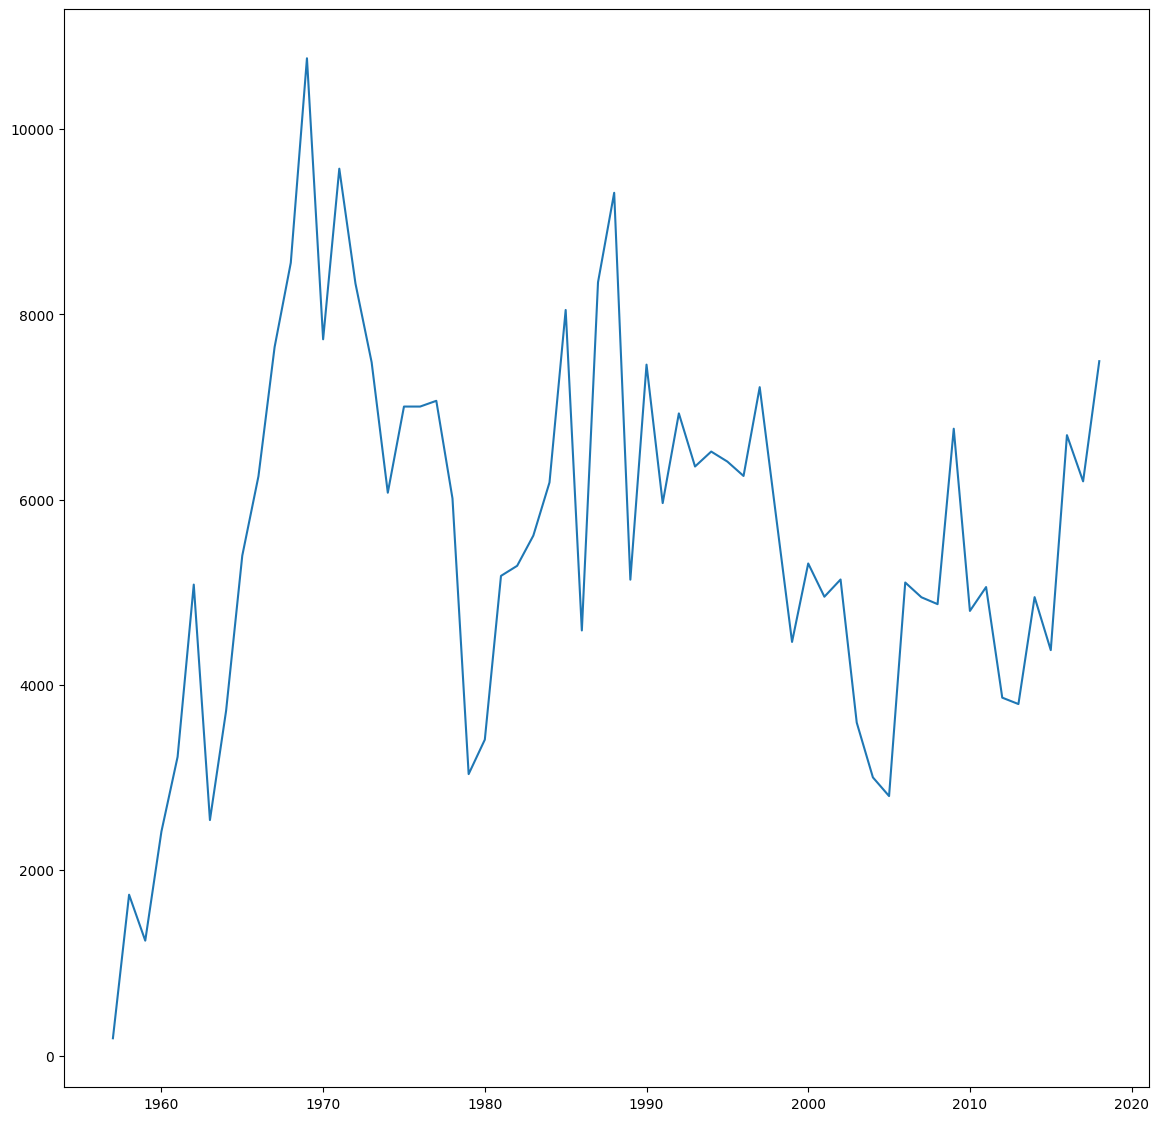

In [94]:

plt.figure(figsize=(14, 14))

plt.plot(price_by_year.index[:-2], price_by_year.values[:-2])

plt.show()

**How expensive are the launches?**
(Histogram: showing frequency distributions.)

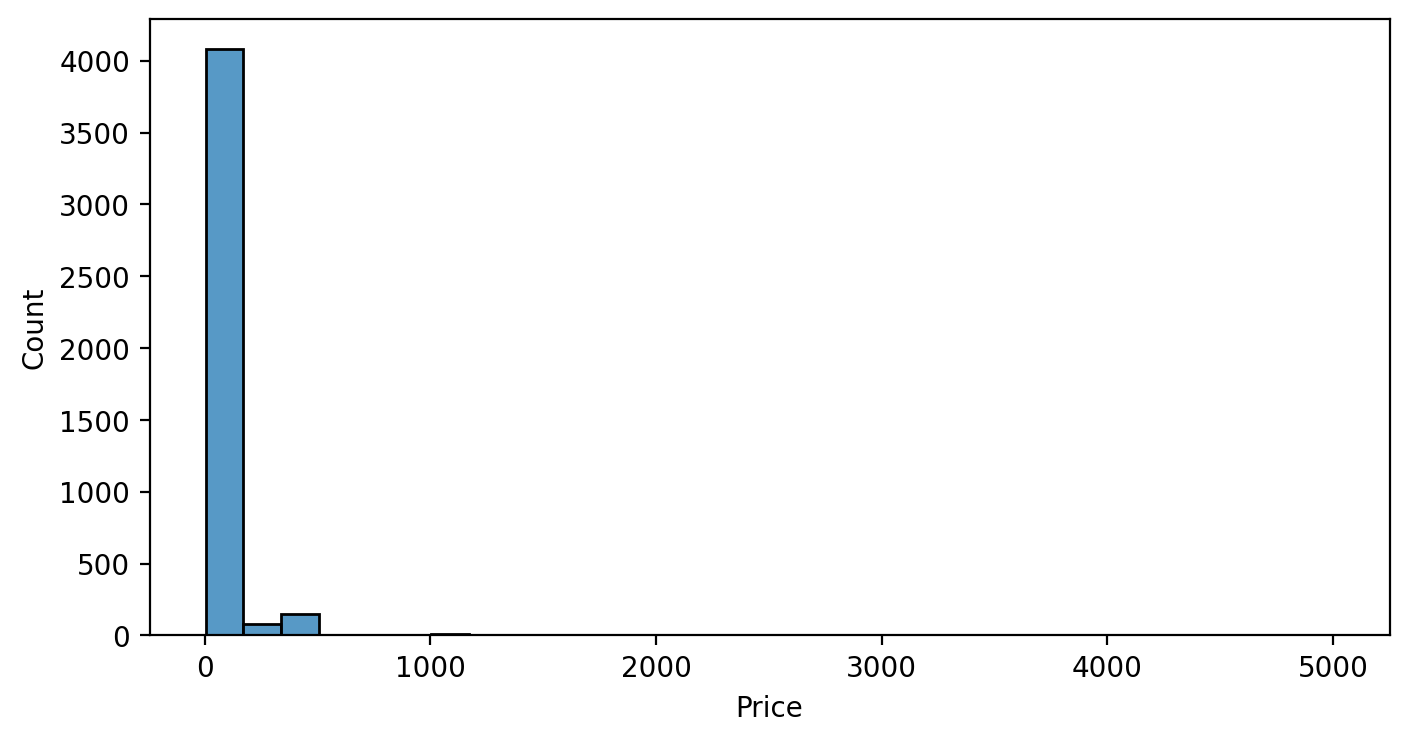

In [95]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=data,
             x=data.Price,
             bins=30,)
plt.show()

**Analyse the Total Amount of Money Spent by Organisation on Space Missions**

In [96]:
price_sum_by_org = data.groupby('Organisation').agg({'Price': pd.Series.sum})
price_sum_by_org

,Price
Organisation,
AEB,186.00
AMBA,496.00
ASI,558.00
Arianespace,27691.00
Arm??e de l'Air,248.00
Blue Origin,744.00
Boeing,9239.00
CASC,12106.26
CASIC,310.00


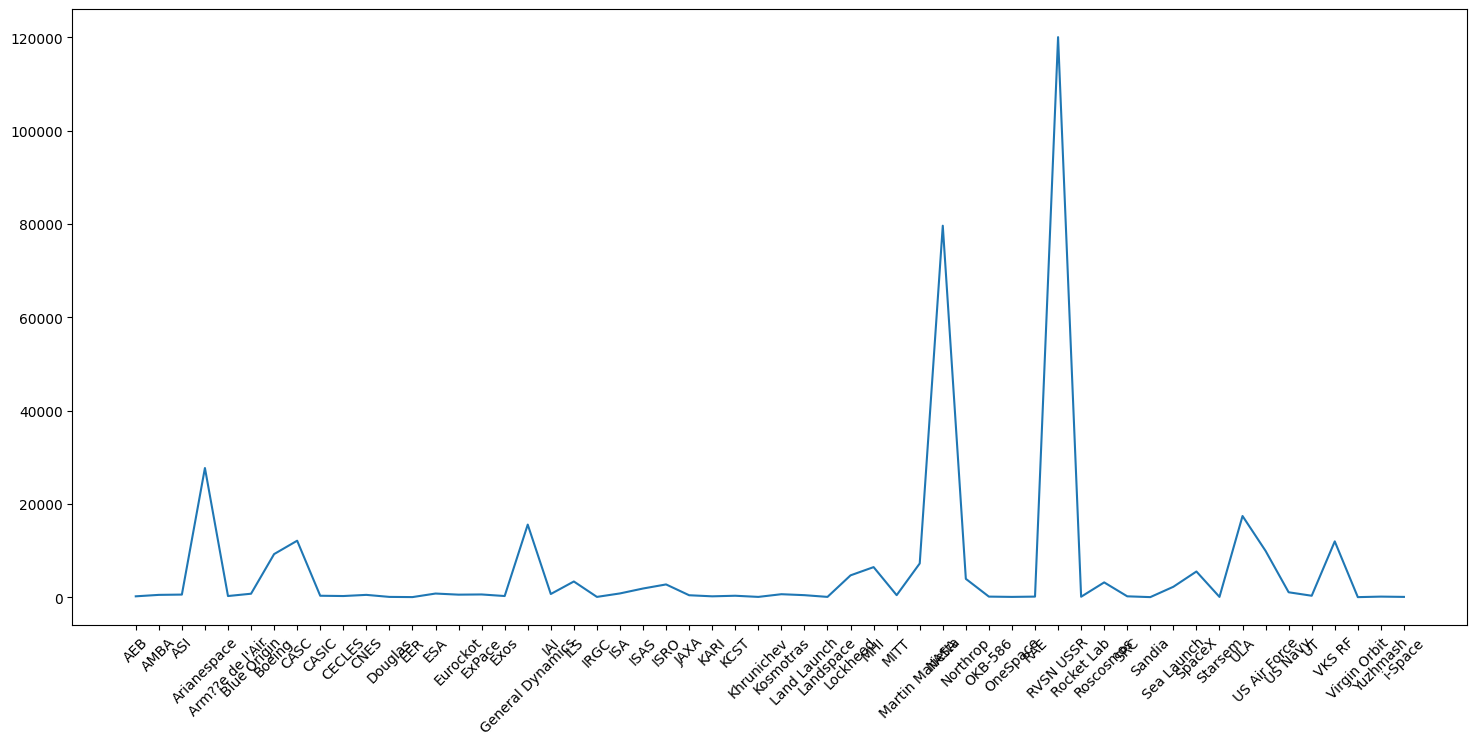

In [97]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)

plt.plot(price_sum_by_org)
plt.show()

**Analyse the Amount of Money Spent by Organisation per Launch**

In [98]:
price_avg_by_org = data.groupby('Organisation').agg({'Price': pd.Series.mean})
price_avg_by_org

,Price
Organisation,
AEB,62.000000
AMBA,62.000000
ASI,62.000000
Arianespace,99.250896
Arm??e de l'Air,62.000000
Blue Origin,62.000000
Boeing,67.933824
CASC,48.232112
CASIC,62.000000


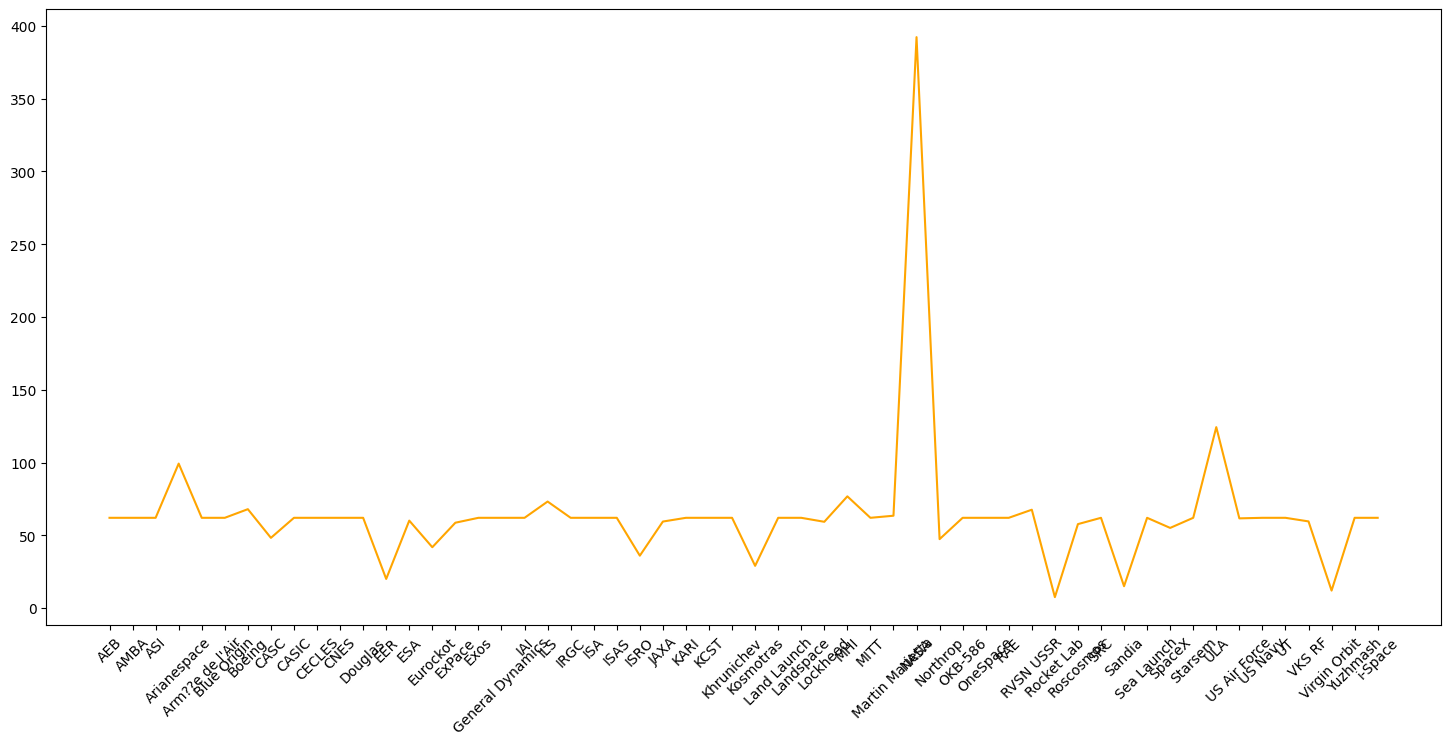

In [99]:
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)

plt.plot(price_avg_by_org, color='orange')
plt.show()

**Which Months are the most popular for Launches?**

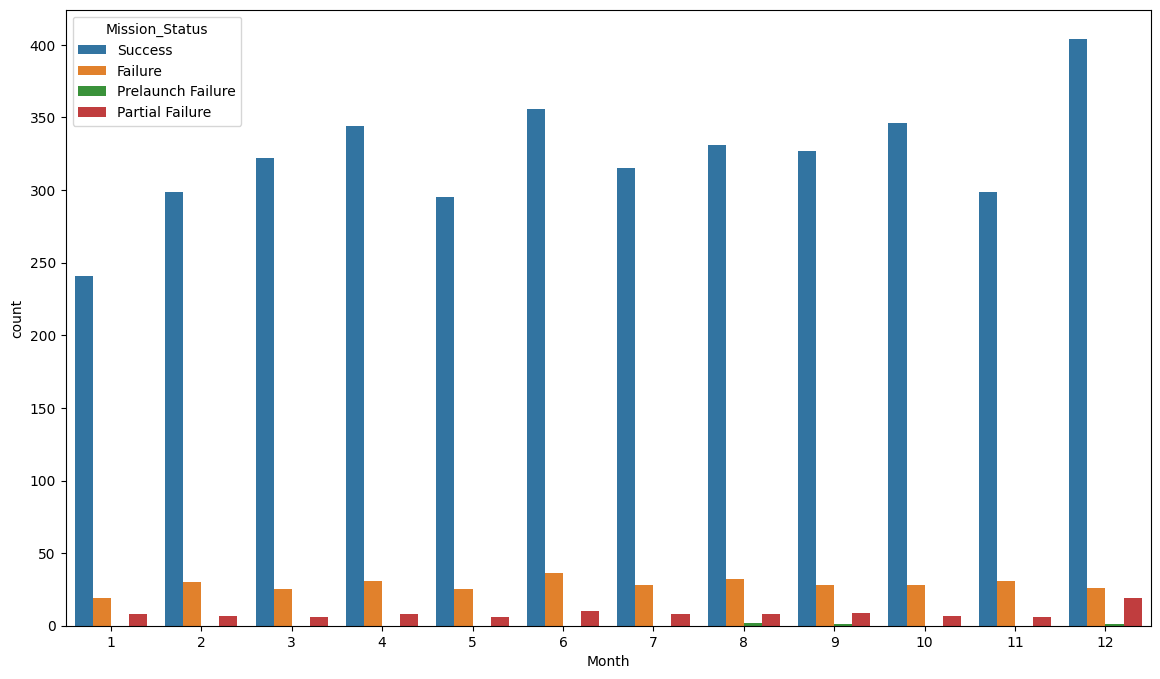

In [100]:
plt.figure(figsize=(14, 8))

sns.countplot(data=data, x='Month', hue='Mission_Status')
plt.show()

**Using a Coropleth Map to Show the Number of Launches by Country**

In [101]:
country_counts = data['Alpha3_code'].value_counts()
country_counts

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
UMI      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Alpha3_code, dtype: int64

In [102]:
plt.figure(figsize=(14, 8))
fig = px.choropleth(data, locations=country_counts.index,
                    color=country_counts.values,
                    hover_name=country_counts.index,
                    color_continuous_scale="Viridis")
fig.show()

<Figure size 1400x800 with 0 Axes>

**Number of Active vs. Retired Rockets**

In [103]:
rocket_status = data['Rocket_Status'].value_counts()
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [104]:
fig = px.pie(data, names=rocket_status.index, values=rocket_status.values,
             title='Rocket Status',)
fig.update_layout()
fig.show()